In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

In [127]:
df_08 = pd.read_excel('./all_alpha_08.xls')
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [128]:
df_18 = pd.read_excel('./all_alpha_18.xlsx')
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV03.08H3,small SUV,3,26,27,27,6,No,330
3,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXV03.08H3,small SUV,3,26,27,27,6,No,330
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV03.5RH3,small SUV,3,19,27,22,4,No,404


In [129]:
sum(df_08.duplicated())

25

In [130]:
sum(df_18.duplicated())

0

In [132]:
list_08_drop = ['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG']
list_18_drop = ['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2']

df_08.drop(list_08_drop, axis=1, inplace=True)
df_18.drop(list_18_drop, axis=1, inplace=True)


In [133]:
df_08.rename({"Sales Area": "Cert Region"}, axis=1, inplace=True)
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no


In [134]:
columns = df_08.columns.str.replace(' ', '_')
columns = columns.str.lower()
df_08.columns = columns
df_18.columns = columns
df_18.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,25,35,29,6,No
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,small car,3,25,35,29,6,No
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,CA,small SUV,3,26,27,27,6,No
3,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,FA,small SUV,3,26,27,27,6,No
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,small SUV,3,19,27,22,4,No


In [240]:
df_08_ca = df_08.query('cert_region == "CA" ')
df_18_ca = df_18.query('cert_region == "CA" ')
df_08_ca.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no
6,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,CA,midsize car,7,18,26,21,6,yes
7,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,CA,midsize car,7,17,26,20,6,yes


In [241]:
df_08_ca = df_08_ca.drop('cert_region', axis=1).drop_duplicates().dropna()
df_18_ca = df_18_ca.drop('cert_region', axis=1).drop_duplicates().dropna()

In [222]:
print('There are %.f rows and %.f columns in the CA 2008 dataset' %(df_08_ca.shape[0], df_08_ca.shape[1]))
print('There are %.f rows and %.f columns in the CA 2018 dataset' %(df_18_ca.shape[0], df_18_ca.shape[1]))

There are 986 rows and 13 columns in the CA 2008 dataset
There are 1307 rows and 13 columns in the CA 2018 dataset


In [152]:
sum(df_08_ca.duplicated())

0

In [154]:
df_18_ca.isna()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,False,False,False,False,False,False,False,False,False,False,False,False,False
2705,False,False,False,False,False,False,False,False,False,False,False,False,False
2707,False,False,False,False,False,False,False,False,False,False,False,False,False
2709,False,False,False,False,False,False,False,False,False,False,False,False,False


In [167]:
for col, col_data in df_08_ca.iteritems():
    print(col, col_data.dtype)
    
for col, col_data in df_18_ca.iteritems():
    print(col, col_data.dtype)

model object
displ float64
cyl object
trans object
drive object
fuel object
cert_region object
veh_class object
air_pollution_score object
city_mpg object
hwy_mpg object
cmb_mpg object
greenhouse_gas_score object
smartway object
model object
displ float64
cyl float64
trans object
drive object
fuel object
cert_region object
veh_class object
air_pollution_score int64
city_mpg object
hwy_mpg object
cmb_mpg object
greenhouse_gas_score int64
smartway object


In [223]:
for i in range(df_08_ca.shape[0]):
    df_08_ca.cyl[i] = int(df_08_ca.cyl.values[i][1])

/Users/mohammad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [224]:
df_08_ca.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
6,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
7,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes


In [238]:
def str2int(x):
    '''
    This function extract cyl number from a string and change it to an int
    '''
    return int(x[1])

In [242]:
df_08_ca.cyl = df_08_ca.cyl.apply(str2int)


In [243]:
df_08_ca.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
4,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
6,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
7,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes


In [254]:
df_18_ca.cyl = df_18_ca.cyl.astype('int64')


In [255]:
for col, col_data in df_18_ca.iteritems():
    print(col, col_data.dtype)

model object
displ float64
cyl int64
trans object
drive object
fuel object
veh_class object
air_pollution_score int64
city_mpg object
hwy_mpg object
cmb_mpg object
greenhouse_gas_score int64
smartway object


In [256]:
df_18_ca.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,small car,3,25,35,29,6,No
2,ACURA MDX,3.0,6,AMS-7,4WD,Gasoline,small SUV,3,26,27,27,6,No
4,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,small SUV,3,19,27,22,4,No
5,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,small SUV,3,20,27,23,5,No
8,ACURA MDX,3.5,6,SemiAuto-9,4WD,Gasoline,small SUV,3,18,26,21,4,No


In [279]:
df_18_ca.air_pollution_score = df_18_ca.air_pollution_score.astype('float64')


In [281]:
def str2float(x):
    '''
    This function extract cyl number from a string and change it to a flaot
    '''
    return float(x[0])

In [283]:
df_08_ca.air_pollution_score = df_08_ca.air_pollution_score.apply(str2float)

In [284]:
for col, col_data in df_08_ca.iteritems():
    print(col, col_data.dtype)

model object
displ float64
cyl int64
trans object
drive object
fuel object
veh_class object
air_pollution_score float64
city_mpg object
hwy_mpg object
cmb_mpg object
greenhouse_gas_score object
smartway object


In [ ]:
list1 = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for item in list1:
    df_08_ca[item] = df_08_ca[item].apply(str2float)

for item in list1:
    df_18_ca[item] = df_18_ca[item].apply(str2float)

In [296]:
def str2int(x):
    '''
    This function extract cyl number from a string and change it to an int
    '''
    return int(x[0])

In [297]:
df_08_ca.greenhouse_gas_score = df_08_ca.greenhouse_gas_score.apply(str2int)

In [298]:
for col, col_data in df_08_ca.iteritems():
    print(col, col_data.dtype)

model object
displ float64
cyl int64
trans object
drive object
fuel object
veh_class object
air_pollution_score float64
city_mpg float64
hwy_mpg float64
cmb_mpg float64
greenhouse_gas_score int64
smartway object


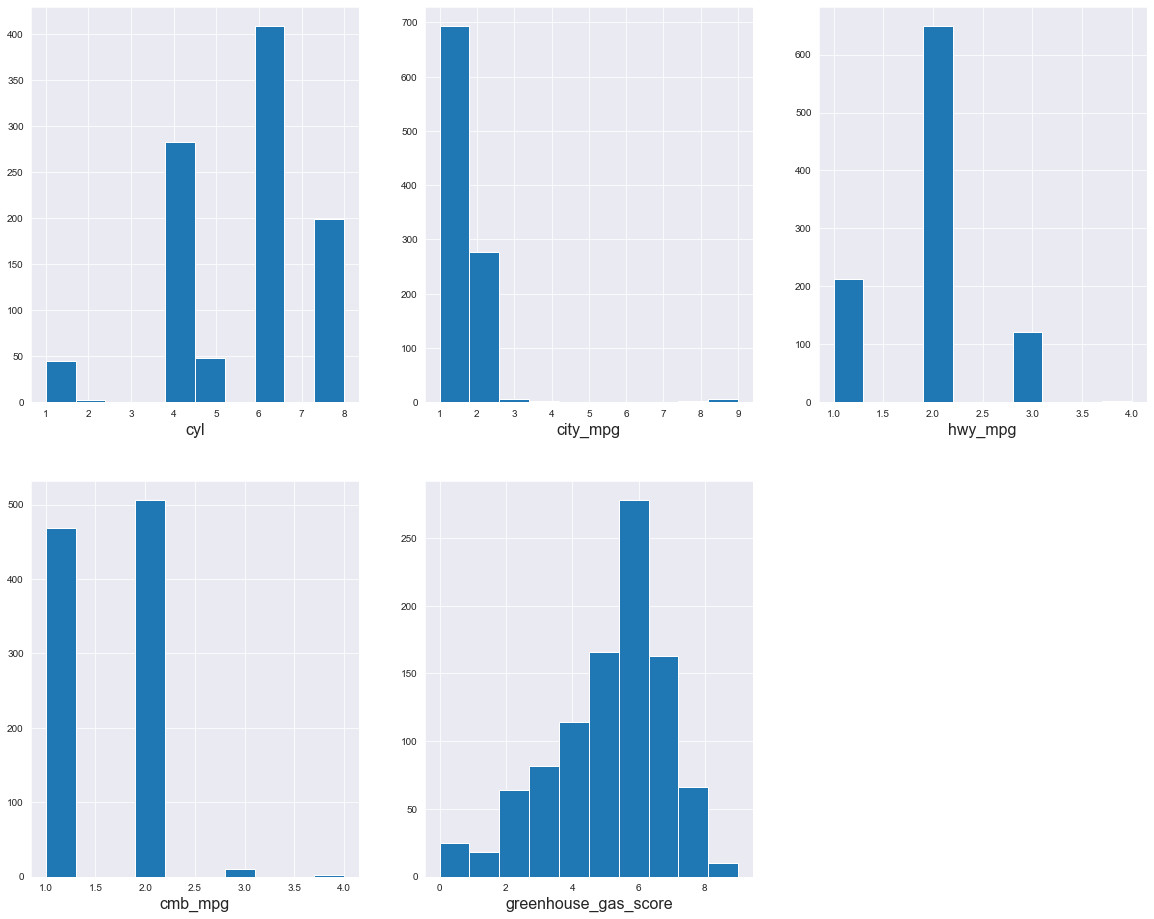

In [311]:
plt.figure(figsize=(20,16))
plot_list = [ 'cyl','city_mpg', 'hwy_mpg', 'cmb_mpg','greenhouse_gas_score']
for i, col in enumerate(plot_list):
    plt.subplot(2,3,i+1)
    df_08_ca[col].hist()
    plt.xlabel(col, fontsize = 16)

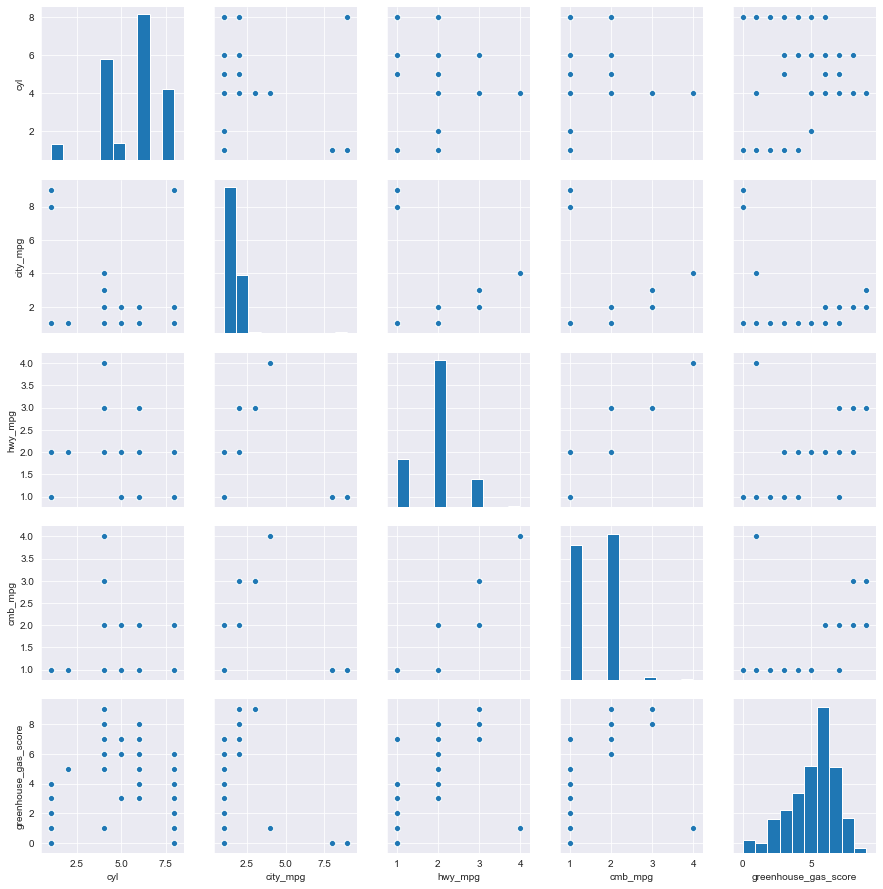

In [312]:
sns.pairplot(df_08_ca[plot_list])